In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import files
import os

In [0]:
from fastai.vision import *

### Download data from Kaggle

In [4]:
! {sys.executable} -m pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.5)


In [5]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
os.listdir()
# os.listdir('/root')

['.config', 'kaggle.json', 'sample_data']

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [8]:
path = Config.data_path()/'architecture'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/architecture')

In [9]:
! kaggle datasets download wwymak/architecture-dataset -f arcDataset.zip -p {path}

 98% 721M/732M [00:13<00:00, 49.3MB/s]
100% 732M/732M [00:13<00:00, 58.5MB/s]


In [0]:
! unzip -q -n {path}/arcDataset.zip -d {path}

In [11]:
os.listdir('/root/.fastai/data/architecture/arcDataset')

['Queen Anne architecture',
 'Art Deco architecture',
 'Byzantine architecture',
 'Achaemenid architecture',
 'Colonial architecture',
 'relationship.txt',
 'Art Nouveau architecture',
 'International style',
 'Baroque architecture',
 'Postmodern architecture',
 'Gothic architecture',
 'American craftsman style',
 'Romanesque architecture',
 'Russian Revival architecture',
 'ReadMe',
 'Ancient Egyptian architecture',
 'Palladian architecture',
 'Georgian architecture',
 'arcNames25.txt',
 'American Foursquare architecture',
 'Edwardian architecture',
 'arcRelationship25.txt',
 'ReadMe~',
 'Deconstructivism',
 'Greek Revival architecture',
 'Novelty architecture',
 'Beaux-Arts architecture',
 'Bauhaus architecture',
 'Tudor Revival architecture',
 'Chicago school architecture']

### Looking at the data

In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

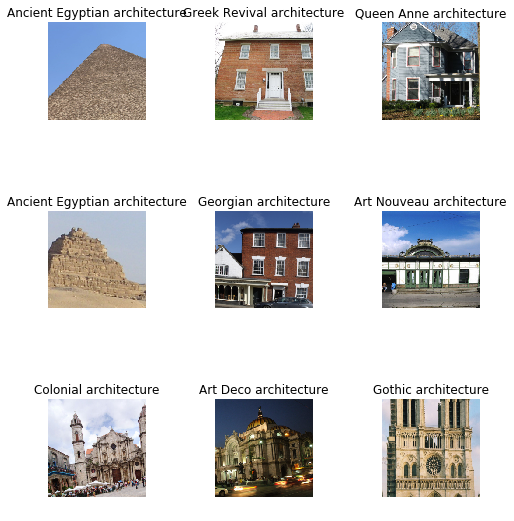

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Achaemenid architecture',
  'American Foursquare architecture',
  'American craftsman style',
  'Ancient Egyptian architecture',
  'Art Deco architecture',
  'Art Nouveau architecture',
  'Baroque architecture',
  'Bauhaus architecture',
  'Beaux-Arts architecture',
  'Byzantine architecture',
  'Chicago school architecture',
  'Colonial architecture',
  'Deconstructivism',
  'Edwardian architecture',
  'Georgian architecture',
  'Gothic architecture',
  'Greek Revival architecture',
  'International style',
  'Novelty architecture',
  'Palladian architecture',
  'Postmodern architecture',
  'Queen Anne architecture',
  'Romanesque architecture',
  'Russian Revival architecture',
  'Tudor Revival architecture'],
 25,
 3836,
 958)

### Training: resnet34

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 85814316.67it/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.528123,1.461897,0.459290,02:27
1,1.697436,1.159935,0.354906,02:26
2,1.301183,1.056665,0.320459,02:26
3,1.080745,1.035444,0.307933,02:26


In [0]:
learn.save('stage-1-resnet30')

### Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
interp.most_confused(min_val=5)

[('Queen Anne architecture', 'Tudor Revival architecture', 10),
 ('American craftsman style', 'Queen Anne architecture', 8),
 ('American craftsman style', 'Tudor Revival architecture', 8),
 ('Beaux-Arts architecture', 'Art Nouveau architecture', 8),
 ('Art Deco architecture', 'International style', 5),
 ('Palladian architecture', 'Greek Revival architecture', 5),
 ('Postmodern architecture', 'International style', 5),
 ('Tudor Revival architecture', 'Queen Anne architecture', 5)]

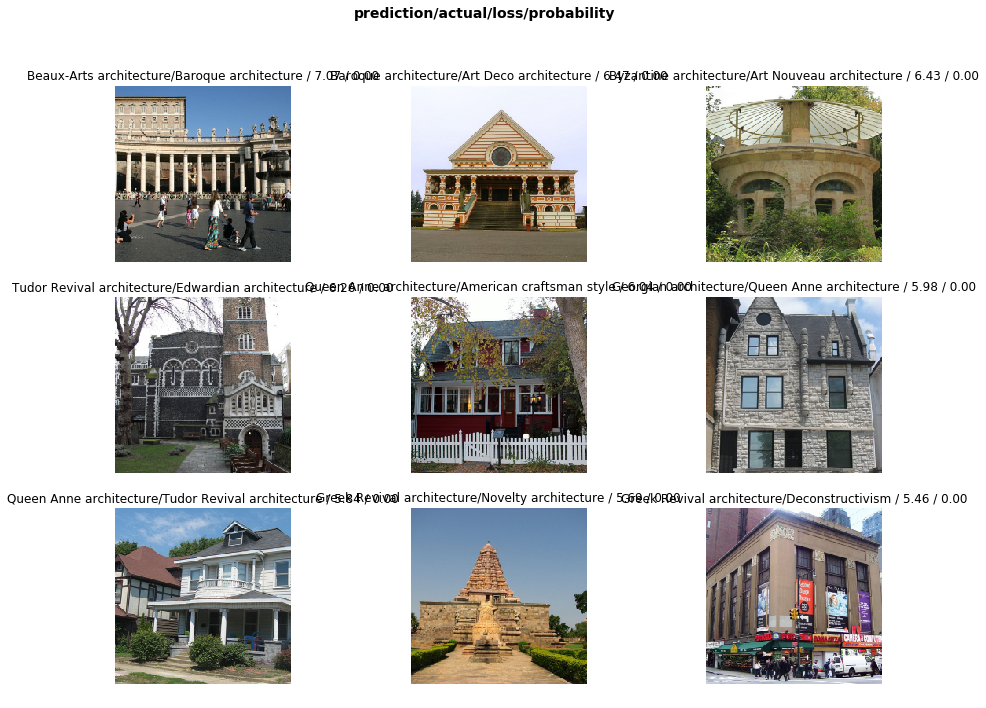

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

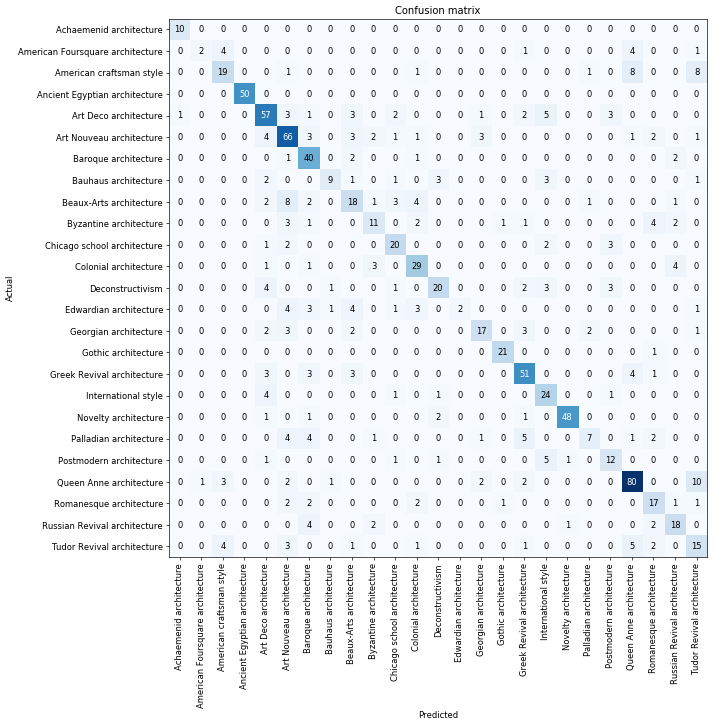

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


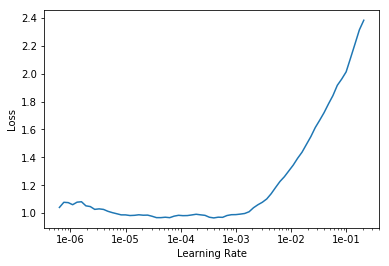

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.985204,1.000565,0.298539,02:28
1,0.901527,0.957250,0.282881,02:30
2,0.850415,0.937412,0.277662,02:29
3,0.811286,0.930929,0.276618,02:30


In [0]:
learn.save('stage-2-resnet30')

In [27]:
os.listdir('/root/.fastai/data/architecture')

['arcDataset', 'models', 'arcDataset.zip']

In [0]:
learn.export()

In [37]:
#!cp /root/.fastai/data/architecture/export.pkl .

export.pkl  sample_data


### Training: resnet50

In [0]:
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        # ds_tfms=get_transforms(), size=299, num_workers=4, bs=32).normalize(imagenet_stats)

In [38]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 110036691.08it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


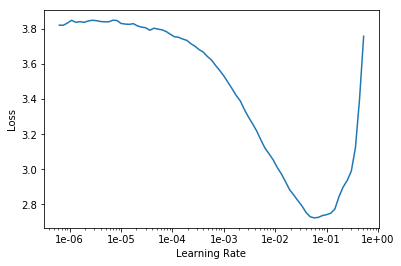

In [39]:
learn.lr_find()
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.067068,1.279064,0.382046,02:38
1,1.414662,1.080656,0.327766,02:35
2,1.074589,0.960758,0.279749,02:35
3,0.847968,0.956121,0.278706,02:35


In [0]:
learn.save('stage-1-resnet50')

### Unfreezing, fine-tuning and learning rates

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


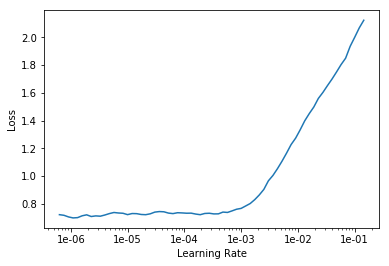

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.703855,0.934233,0.271399,02:40
1,0.688604,0.903132,0.259916,02:41
2,0.627360,0.892913,0.259916,02:40
3,0.598286,0.886432,0.253653,02:41


In [0]:
learn.save('stage-2-resnet50')

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[('American craftsman style', 'Queen Anne architecture', 8),
 ('Art Deco architecture', 'Art Nouveau architecture', 7),
 ('Palladian architecture', 'Greek Revival architecture', 7),
 ('Postmodern architecture', 'International style', 6),
 ('Tudor Revival architecture', 'Queen Anne architecture', 6),
 ('Deconstructivism', 'Art Deco architecture', 5)]

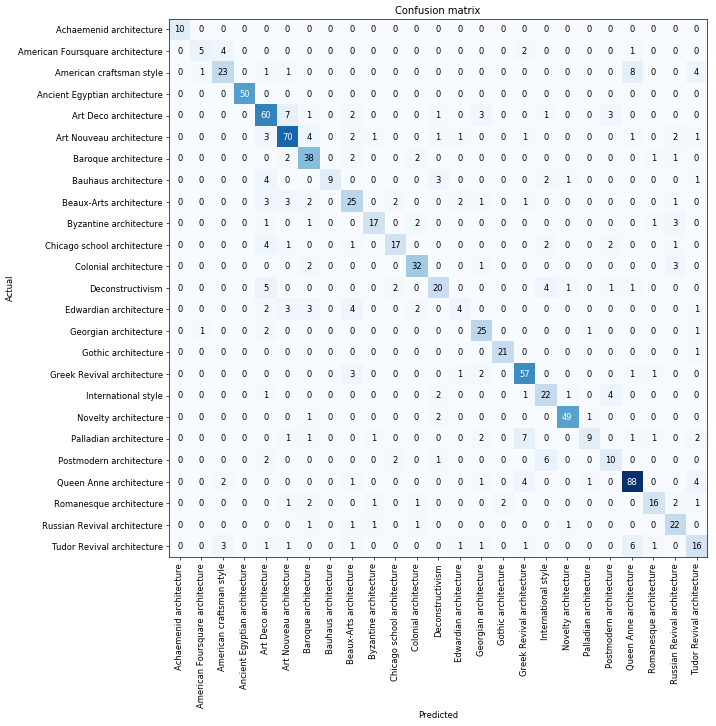

In [47]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Putting model in production

In [0]:
#learn.export()

In [0]:
# defaults.device = torch.device('cpu')

In [0]:
#os.listdir('/root/.fastai/data/architecture/arcDataset')

In [0]:
#os.listdir(path/'models')

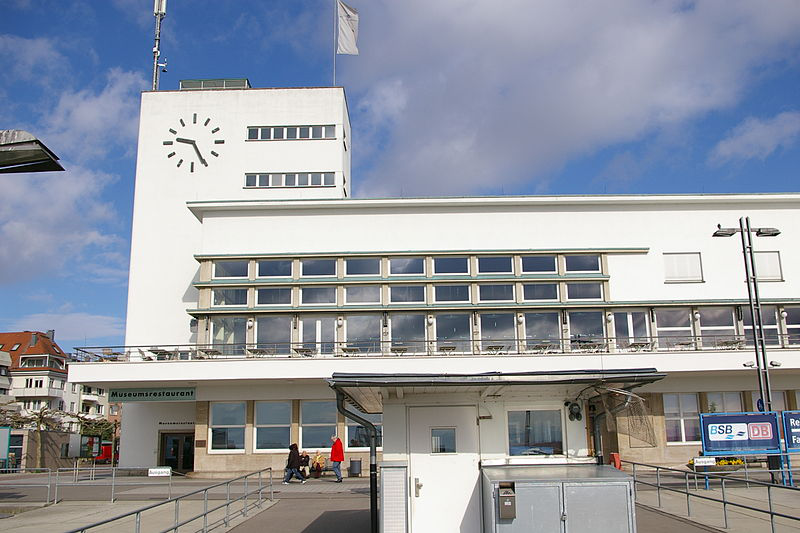

In [48]:
img = open_image(path/'arcDataset'/'Bauhaus architecture'/'46_800px-Friedrichshafen_Hafenbahnhof_Zeppelinmuseum.jpg')
img

In [0]:
#learn = load_learner(path)

In [49]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Bauhaus architecture

In [51]:
!rm /root/.fastai/data/architecture/export.pkl
os.listdir('/root/.fastai/data/architecture')

['arcDataset', 'models', 'arcDataset.zip']

In [0]:
learn.export()

In [54]:
os.listdir('/root/.fastai/data/architecture')

['arcDataset', 'export.pkl', 'models', 'arcDataset.zip']

In [57]:
!ls
#!rm export.pkl

sample_data


In [0]:
#from google.colab import files
#files.download('/root/.fastai/data/architecture/export.pkl') 
!cp /root/.fastai/data/architecture/export.pkl .